### Creating Time-Series Charts

This example shows how to plot a time-series chart from [Sentinel-2](https://sentinel.esa.int/web/sentinel/missions/sentinel-2) [Normalized difference vegetation index (NDVI)](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index) data held in an excel file. We will also see how to smooth a time series using moving averages using pandas `.rolling()`.

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [5]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [6]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)


data_url = 'https://github.com/spatialthoughts/python-dataviz-web/raw/main/data/misc/'
filename = 'ndvi_data.xlsx'
download(data_url + filename)

#### Data Pre-Processing

In [7]:
filepath = os.path.join(data_folder, filename)
df = pd.read_excel(filepath)
df

,Sensor,Date,NDVI
0,Sentinel-2,2017-01-13,0.665569
1,Sentinel-2,2017-02-12,0.782654
2,Sentinel-2,2017-03-04,0.780809
3,Sentinel-2,2017-04-03,0.312634
4,Sentinel-2,2017-04-13,0.160568
...,...,...,...
235,Sentinel-2,2021-12-03,0.210769
236,Sentinel-2,2021-12-08,0.491343
237,Sentinel-2,2021-12-13,0.395918
238,Sentinel-2,2021-12-18,0.625537


We set the 'Date' column as the index of the dateframe. This will allow us to filter and plot the time-series data easily.

In [8]:
df = df.set_index(pd.to_datetime(df['Date']))
df

,Sensor,Date,NDVI
Date,,,
2017-01-13,Sentinel-2,2017-01-13,0.665569
2017-02-12,Sentinel-2,2017-02-12,0.782654
2017-03-04,Sentinel-2,2017-03-04,0.780809
2017-04-03,Sentinel-2,2017-04-03,0.312634
2017-04-13,Sentinel-2,2017-04-13,0.160568
...,...,...,...
2021-12-03,Sentinel-2,2021-12-03,0.210769
2021-12-08,Sentinel-2,2021-12-08,0.491343
2021-12-13,Sentinel-2,2021-12-13,0.395918


Create a chart with time-series of values in the 'NDVI' column. We use `mdates` module to control the tick-marks on X-Axis.

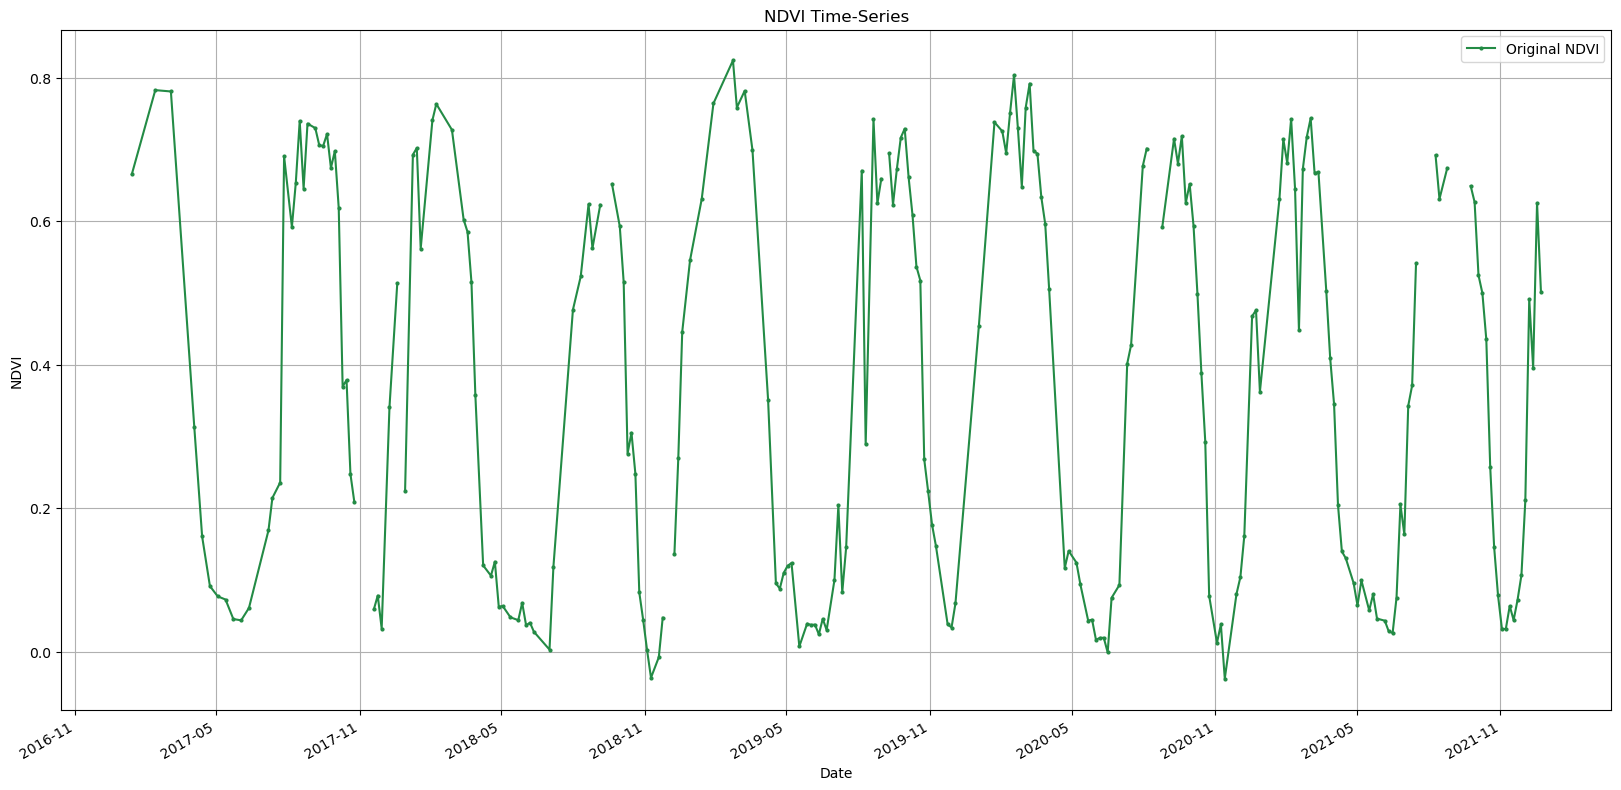

In [9]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20,10)
df.plot(y='NDVI', kind='line', ax=ax,
        marker='o', markersize=2, color='#238b45',
        label='Original NDVI')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6)) # mdates controls the tick-marks on x-axis - interval
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m")) # mdates controls the tick-marks on x-axis - date format

ax.grid('on')
ax.set_title('NDVI Time-Series')
ax.set_ylabel('NDVI')

# Save the plot
output_folder = 'output'
output_path = os.path.join(output_folder, 'ndvi_time_series.png')
plt.savefig(output_path)

plt.show()

#### Time Series Smoothing with Moving Average

Pandas has built-in method `rolling()` to allow us to compute moving averages. Let's smooth the time-series with a moving-window average.

### 30 day moving average

In [17]:
window_size_days_30 = 30 # 30 day moving average
window = '{}D'.format(window_size_days_30)
df_smooth_30 = df.copy()
df_smooth_30['NDVI_smooth_30'] = df['NDVI'].rolling(window, center=True).mean()
df_smooth_30

,Sensor,Date,NDVI,NDVI_smooth_30
Date,,,,
2017-01-13,Sentinel-2,2017-01-13,0.665569,0.665569
2017-02-12,Sentinel-2,2017-02-12,0.782654,0.782654
2017-03-04,Sentinel-2,2017-03-04,0.780809,0.780809
2017-04-03,Sentinel-2,2017-04-03,0.312634,0.236601
2017-04-13,Sentinel-2,2017-04-13,0.160568,0.188162
...,...,...,...,...
2021-12-03,Sentinel-2,2021-12-03,0.210769,0.316992
2021-12-08,Sentinel-2,2021-12-08,0.491343,0.388573
2021-12-13,Sentinel-2,2021-12-13,0.395918,0.444981


### 60 day moving average

In [18]:
window_size_days_60 = 60 # 7 day moving average
window = '{}D'.format(window_size_days_60)
df_smooth_60 = df.copy()
df_smooth_60['NDVI_smooth_60'] = df['NDVI'].rolling(window, center=True).mean()
df_smooth_60

,Sensor,Date,NDVI,NDVI_smooth_60
Date,,,,
2017-01-13,Sentinel-2,2017-01-13,0.665569,0.724111
2017-02-12,Sentinel-2,2017-02-12,0.782654,0.781732
2017-03-04,Sentinel-2,2017-03-04,0.780809,0.625366
2017-04-03,Sentinel-2,2017-04-03,0.312634,0.160370
2017-04-13,Sentinel-2,2017-04-13,0.160568,0.142807
...,...,...,...,...
2021-12-03,Sentinel-2,2021-12-03,0.210769,0.254225
2021-12-08,Sentinel-2,2021-12-08,0.491343,0.278973
2021-12-13,Sentinel-2,2021-12-13,0.395918,0.305891


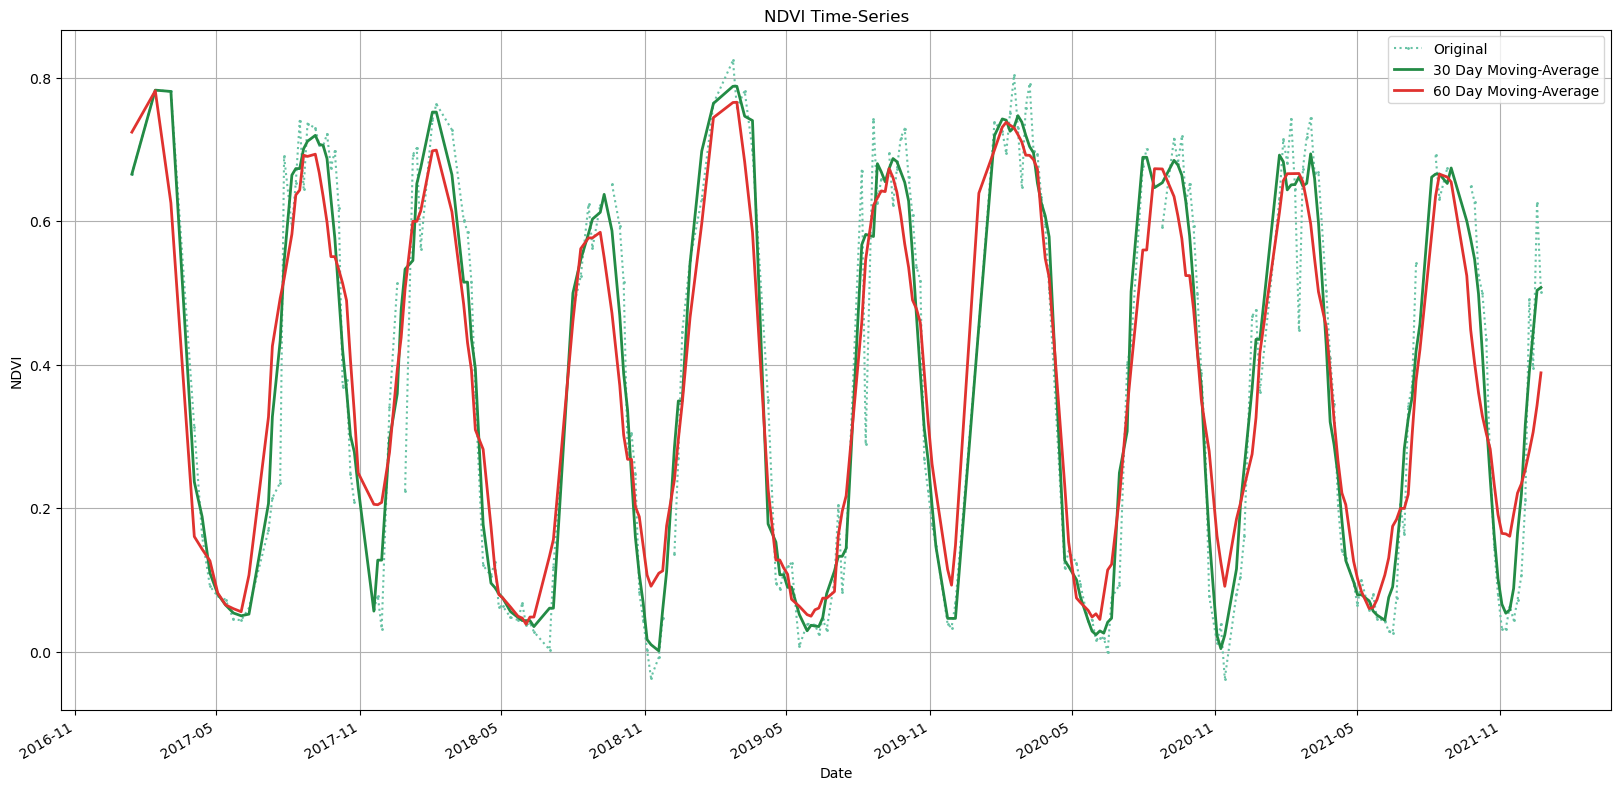

In [19]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20,10)

# plot the original time series
df.plot(y='NDVI', kind='line', ax=ax,
                  marker='o', markersize=1, color='#66c2a4', linestyle='dotted',
                  label='Original')

# overlay a 30 day moving average
df_smooth_30.plot(y='NDVI_smooth_30', kind='line', ax=ax,
                  marker='o', linewidth= 2, markersize=0, color='#238b45',
                  label='{} Day Moving-Average'.format(window_size_days_30))


# overlay a 60 day moving average
df_smooth_60.plot(y='NDVI_smooth_60', kind='line', ax=ax,
                  marker='o', linewidth= 2, markersize=0, color='#e0322f',
                  label='{} Day Moving-Average'.format(window_size_days_60))


ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

ax.grid('on')

ax.set_title('NDVI Time-Series')
ax.set_ylabel('NDVI')

# Save the plot
output_folder = 'output'
output_path = os.path.join(output_folder, 'smooth_ndvi_time_series.png')
plt.savefig(output_path)

plt.show()